# Project: Investigate a TMDb Movies Dataset 

## Table of Contents
by Eric Law 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This movies dataset that i selected consists useful information about 10,000 movies including genres, ratings, revenue, budget, and more. The primary goal of the project is to go through the general data analysis process — using basic data analysis technique with NumPy, pandas, and Matplotlib.

1) Which genres are the most popular <br>2) The most and least profit movies <br>3)  What kinds of properties are associated with movies that make high rating


In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from datetime import datetime


<a id='wrangling'></a>
## Data Wrangling



In [102]:
# Load Data
df1 = pd.read_csv("tmdb-movies.csv",index_col=None)
df1.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [103]:
df1.shape

(10866, 21)

In [104]:
#statistical description
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [105]:
df1.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

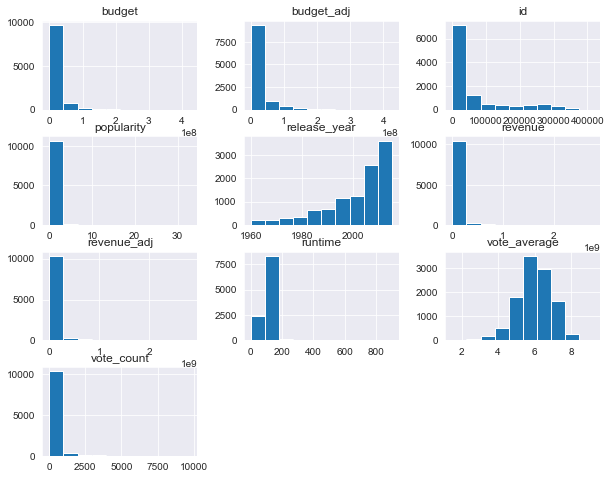

In [106]:
df1.hist(figsize = (10, 8));



### Data Cleaning 

In [107]:
df2 = df1.copy()


In [108]:
#dropping columns that is not use for analysis
columns = ['id','imdb_id','homepage','tagline','keywords','overview','vote_count','budget_adj','revenue_adj']
df2.drop(columns,axis=1,inplace=True)

In [109]:
df2.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015


In [110]:
df2.duplicated().sum()

1

In [111]:
df2.drop_duplicates(inplace=True)

In [112]:
df2.duplicated().sum()

0

In [113]:
df2.dropna(inplace=True)

In [114]:
#changing release date type to datetime 
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2.dtypes


popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
dtype: object

In [115]:
#checking runtime column , it seems there is something wrong with runtime.
df2['runtime'].describe()

count    9772.000000
mean      102.926627
std        27.877432
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [116]:
#replacing runtime 0 with mean
df2['runtime'] = df2['runtime'].replace(0,102.926627)
df2['runtime'].describe()

count    9772.000000
mean      103.063554
std        27.623136
min         3.000000
25%        91.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [117]:
df2.shape

(9772, 12)

<a id='eda'></a>
## Exploratory Data Analysis




# Question 1: Which genres are the most popular? 

In [118]:
df2['genres'].value_counts().index.tolist()

['Drama',
 'Comedy',
 'Drama|Romance',
 'Comedy|Drama',
 'Comedy|Romance',
 'Horror|Thriller',
 'Horror',
 'Comedy|Drama|Romance',
 'Documentary',
 'Drama|Thriller',
 'Comedy|Family',
 'Action|Thriller',
 'Thriller',
 'Drama|Comedy',
 'Crime|Drama|Thriller',
 'Animation|Family',
 'Crime|Drama',
 'Comedy|Horror',
 'Drama|Comedy|Romance',
 'Action',
 'Action|Comedy',
 'Drama|History',
 'Drama|Horror|Thriller',
 'Action|Crime|Drama|Thriller',
 'Action|Crime|Thriller',
 'Horror|Mystery|Thriller',
 'Comedy|Crime',
 'Horror|Science Fiction',
 'Thriller|Horror',
 'Drama|Crime',
 'Drama|Music',
 'Action|Drama|Thriller',
 'Animation|Comedy|Family',
 'Romance|Comedy',
 'Action|Comedy|Crime',
 'Comedy|Drama|Family',
 'Documentary|Music',
 'Action|Adventure|Thriller',
 'Drama|Mystery|Thriller',
 'Thriller|Drama',
 'Romance|Drama',
 'Drama|Family',
 'Action|Adventure|Comedy',
 'Horror|Science Fiction|Thriller',
 'Crime|Drama|Mystery|Thriller',
 'Action|Thriller|Crime',
 'Action|Science Fiction',
 '

In [119]:
#splitting genres , i realise the code does not  work if df2.dropna(inplace=True) is not applied.
df3=pd.DataFrame(data=df2['genres'].str.split('|').tolist(),\
                    index=[df2['release_year']]).stack() 
df3=df3.reset_index([0,1])
df3.drop(columns=['level_1'],inplace=True)
df3.rename(mapper={0:'genres'},axis=1,inplace=True)  
df3.head()

,release_year,genres
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,Action


In [120]:
df3['genres'].value_counts()

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: genres, dtype: int64

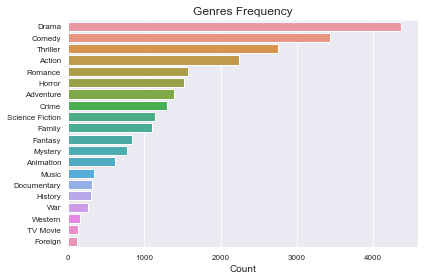

In [121]:
y=df3['genres'].value_counts().index
x=df3['genres'].value_counts().values


sns.barplot(x,y);
plt.xlabel('Count',size=10);
plt.title('Genres Frequency',fontsize=12,loc='center');
plt.xticks(size=8)
plt.yticks(size=8)
plt.tight_layout()
plt.show();


In [122]:
#convert genres column to dict 
df4 =df3['genres'].value_counts()
df5=df4.to_dict()
df5

{'Drama': 4364,
 'Comedy': 3433,
 'Thriller': 2746,
 'Action': 2235,
 'Romance': 1570,
 'Horror': 1526,
 'Adventure': 1384,
 'Crime': 1299,
 'Science Fiction': 1136,
 'Family': 1095,
 'Fantasy': 840,
 'Mystery': 773,
 'Animation': 617,
 'Music': 339,
 'Documentary': 317,
 'History': 306,
 'War': 258,
 'Western': 160,
 'TV Movie': 132,
 'Foreign': 120}

In [123]:
# Foreign %
df5['Foreign'] / df3['genres'].value_counts().values.sum()

0.00486815415821501

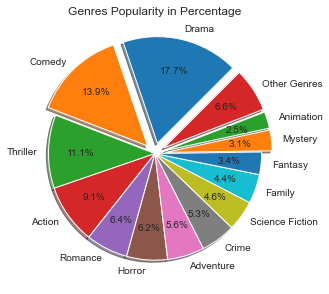

In [124]:
#converting into a pie chart , with %
# As the pie chart generated was a bit messy so i groupby genres with less than <140 count as 'Other Genres' for better visualization 
import itertools
dic={}
for x, y in itertools.groupby(df5, lambda k: 'Other Genres' if (df5[k]<600) else k):
     dic[x] = sum([df5[k] for k in list(y)])   

labels = dic.keys()
sizes = dic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels,explode=(0.1,0.1,0,0,0,0,0,0,0,0,0,0.1,0.1,0.1), autopct='%1.1f%%', startangle=45,pctdistance=0.7,shadow=True)
plt.tight_layout()
plt.title('Genres Popularity in Percentage', fontsize=12 ,loc='center')
plt.show();

Observatons 1: Drama is the most popular genres from time to time as it stands 17% among other genres. The least popular genre is Foreign which hold 0.005%

# Question 2: What is the highest and lowest profit  movie year by year ?

In [125]:
#filter out 0 values
df2_= df2[df2 != 0]
df2_.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


In [126]:
df2_.shape

(9772, 12)

In [127]:
#insert a new column for profit ( Revenue - Budget)
df2_.insert(3, 'profit', df2_['revenue'] - df2_['budget'])


In [128]:
df2_.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


In [129]:
def profit(a):
    a=a.lower()
    if a == "max":
        df2_1=df2_.groupby(['release_year'], sort=True)[['original_title','profit']].max()
        return(df2_1)
        

    elif a == "min":
            df2_1=df2_.groupby(['release_year'], sort=True)[['original_title','profit']].min()
            return(df2_1)
        
        
       
     

# 2a: What is the highest profit movie year by year

In [130]:
profit('max')


,original_title,profit
release_year,,
1960,Village of the Damned,4.800000e+07
1961,West Side Story,2.118800e+08
1962,What Ever Happened to Baby Jane?,5.850000e+07
1963,X: The Man with the X-Ray Eyes,7.639876e+07
1964,Zulu,1.214000e+08
1965,What's New Pussycat?,1.550143e+08
1966,Who's Afraid of Virginia Woolf?,2.623669e+07
1967,You Only Live Twice,2.018436e+08
1968,"Yours, Mine and Ours",4.471537e+07


# 2b: What is the lowest profit movie year by year?

In [131]:
profit('min')

,original_title,profit
release_year,,
1960,13 Ghosts,2905000.0
1961,A Raisin in the Sun,-1700000.0
1962,Advise & Consent,450000.0
1963,55 Days at Peking,-7000000.0
1964,A Hard Day's Night,500549.0
1965,A Charlie Brown Christmas,-8000000.0
1966,A Big Hand for the Little Lady,1347000.0
1967,A Countess from Hong Kong,-9000000.0
1968,2001: A Space Odyssey,-135334.0


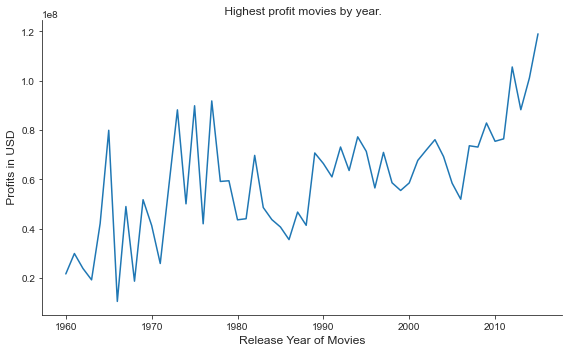

In [394]:
sns.set_style('ticks')
g=sns.relplot(x="release_year", y="profit",ci=None, kind="line", data=df2_);
g.fig.set_size_inches(8,5)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel(' Profits in USD', fontsize = 12)
plt.title(' Highest profit movies by year.')
plt.tight_layout()

Based on the graph, 2015 is the year has the highest profit which is the movie "Zipper"

# Question 3: What kinds of properties are associated with movies that make high rating

In [132]:
#filter out vote_average <8 , Assume >8 consider good rating 
df7=df2_[df2_['vote_average'] > 8]
df7.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
609,0.033378,NaN,NaN,NaN,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240.0,Documentary,Blumhouse Productions|Hit the Ground Running F...,2015-02-08,8.4,2015
611,0.032678,NaN,NaN,NaN,World of Tomorrow,Julia Pott|Winona Mae,Don Hertzfeldt,17.0,Animation|Comedy|Science Fiction,Bitter Films,2015-03-31,8.2,2015


In [133]:
#splitting |
def col(column):
    column = df7[column].str.cat(sep = '|')
    column = pd.Series(column.split('|'))
    count = column.value_counts(ascending = False)
    return count


In [134]:
col('genres')

Drama              12
Documentary        12
Music               7
Crime               7
Comedy              5
Thriller            2
Action              2
Animation           2
Romance             1
War                 1
History             1
Science Fiction     1
Adventure           1
dtype: int64

Both Drama and Documentary have same occurance. 

In [135]:
col('cast')

Uma Thurman            2
Robert Duvall          2
Al Pacino              2
Ben Kingsley           1
Ã‡etin Tekindor        1
                      ..
Marc Smerling          1
H.R. Giger             1
RÃ¼diger Evers         1
Louis Tomlinson        1
Carmen Dell'Orefice    1
Length: 133, dtype: int64

Robert Duvall , All Pacino and Uma Thurman are actors appear in the movie with at least 8 in average rating. 

In [136]:
col('production_companies')

Miramax Films                                           3
Paramount Pictures                                      3
A Band Apart                                            2
Universal Pictures                                      2
Blumhouse Productions                                   2
British Broadcasting Corporation (BBC)                  2
EMI                                                     1
Tiger Aspect Productions                                1
Brain Farm Digital Cinema                               1
Warner Bros.                                            1
British Film Institute (BFI)                            1
Endless Picnic                                          1
AvÅŸar Film                                             1
Historia                                                1
Castle Rock Entertainment                               1
Irwin Entertainment                                     1
Alfran Productions                                      1
Fox 2000 Pictu

It appears that most of the high rating films are from Paramount Pictures.

In [137]:
df7['runtime'].mean()

146.93333333333334

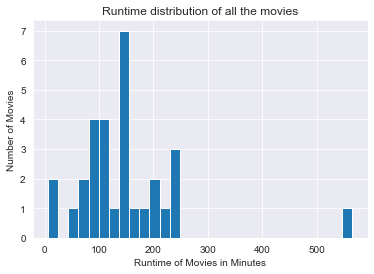

In [138]:
sns.set_style('darkgrid')
plt.hist(df7['runtime'], bins = 30)
plt.xlabel('Runtime of Movies in Minutes')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of all the movies')
plt.show();


As we observed, most of the successful movie runtime is around 146mins. 

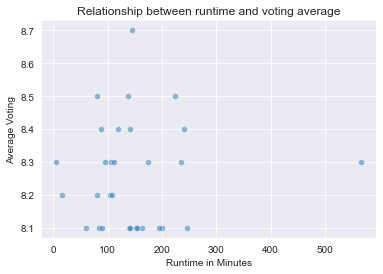

In [139]:
sns.set_style('darkgrid')
plt.title('Relationship between runtime and voting average')
sns.scatterplot(x='runtime', y='vote_average', data=df7, alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Average Voting')
plt.show()

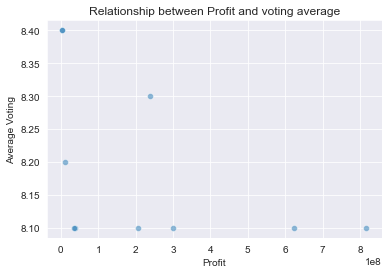

In [140]:
sns.set_style('darkgrid')
plt.title('Relationship between Profit and voting average')
sns.scatterplot(x='profit', y='vote_average', data=df7, alpha=0.5)
plt.xlabel('Profit')
plt.ylabel('Average Voting')
plt.show()

As we observed, high profit does not mean has high rating.

<a id='conclusions'></a>
## Conclusions



After investigating several data, there are several interesting finding about this dataset.


Observatons 1: Drama is the most popular genres from time to time as it stands 17% among other genres. The least popular genre is Foreign which hold 0.005%

Observation 2: Movie revenue has a strong linear relationship with release year. Provided chart shown above the highest and lowest profit of the movie. 2015 is the year has the highest profit which is the movie title "Zipper".  

Observation 3: There are several properties are associated with movies that make high rating. (Assuming >8 is consider a good rating movie) 
- Genres: Both Drama and Documentary genres likely to contribute high rating film.
- Cast: Robert Duvall , All Pacino and Uma Thurman are actors appeared in the movie with at least 8 in average rating.
- Production Companies: It appears that most of the high rating films are from Paramount Pictures & Miramax Film. 
- Average runtime 146mins, there is no correlation between runtime and rating, as most of the film has varied rating 
- Most profit movie does not correspond with high rating 




# Limitation.
<br>The dataset can be further analyse accurately if regression is used to fit and fill up the 0 value instead of mean or remove the row. There are several null and zero values in some features. Because of it, its hinders us to analyse the data accurately and that is why some rows need to be removed for easier investigation. 